In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("wine_fraud.csv")
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol quality type  
0      9.4   Legit  red  
1      9.8   Legit  red  
2      9.8   Legit  red  
3      9.8   Legit  red  
4      9.4   Legit  red

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   object 
 12  type                  6497 non-null   object 
dtypes: float64(11), object(2)
memory usage: 660.0+ KB


In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [10]:
df["quality"].value_counts()

Legit    6251
Fraud     246
Name: quality, dtype: int64

In [11]:
df["quality"].unique()

array(['Legit', 'Fraud'], dtype=object)

<Axes: xlabel='quality', ylabel='count'>

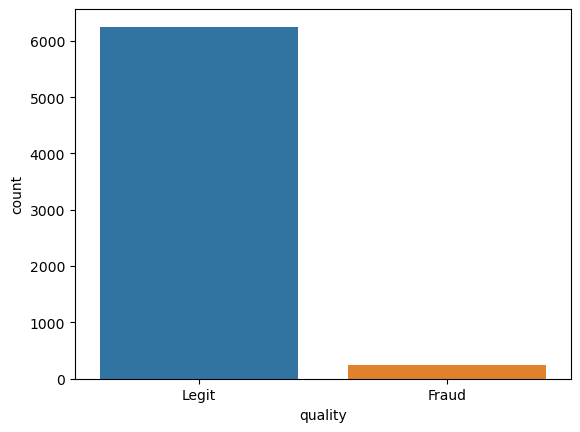

In [12]:
sns.countplot(x="quality", data=df)

#### In the above plot, we can observe that the dataset if highly imbalanced, that is it consists more of legit wines as compared to fradualent wines.

<Axes: xlabel='type', ylabel='count'>

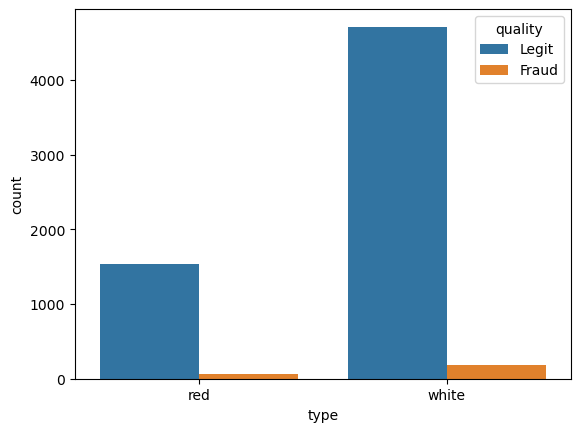

In [13]:
sns.countplot(x="type", data=df, hue="quality")

In [21]:
df[(df["quality"] == "Fraud") & (df["type"] == "red")].describe().transpose()

count       mean        std     min        25%      50%  \
fixed acidity          63.0   7.871429   1.649284  4.6000   6.800000   7.5000   
volatile acidity       63.0   0.724206   0.247970  0.2300   0.565000   0.6800   
citric acid            63.0   0.173651   0.207406  0.0000   0.020000   0.0800   
residual sugar         63.0   2.684921   1.723735  1.2000   1.900000   2.1000   
chlorides              63.0   0.095730   0.075121  0.0450   0.068500   0.0800   
free sulfur dioxide    63.0  12.063492   9.076508  3.0000   5.000000   9.0000   
total sulfur dioxide   63.0  34.444444  26.395123  7.0000  13.500000  26.0000   
density                63.0   0.996689   0.001667  0.9934   0.995655   0.9966   
pH                     63.0   3.384127   0.175100  2.7400   3.300000   3.3800   
sulphates              63.0   0.592222   0.224323  0.3300   0.495000   0.5600   
alcohol                63.0  10.215873   0.918178  8.4000   9.600000  10.0000   

                          75%      max  
fixed acidity          8.4000   12.500  
volatile acidity       0.8825    1.580  
citric acid            0.2700    1.000  
residual sugar         2.9500   12.900  
chlorides              0.0945    0.610  
free sulfur dioxide   15.5000   41.000  
total sulfur dioxide  48.0000  119.000  
density                0.9977    1.001  
pH                     3.5000    3.900  
sulphates              0.6000    2.000  
alcohol               11.0000   13.100

In [35]:
red_total = df[df["type"] == "red"].count()[0]

In [38]:
fraud_total = df[(df["quality"] == "Fraud") & (df["type"] == "red")].count()[0]

In [42]:
percentage = (fraud_total/red_total) * 100
print(f"Percentage of fraud in Red Wines: {percentage}")

Percentage of fraud in Red Wines: 3.9399624765478425


In [41]:
white_total = len(df[df["type"] == "white"])
fraud_total1 = len(df[(df["quality"] == "Fraud") & (df["type"] == "white")])

In [43]:
percentage1 = (fraud_total1/white_total) * 100
print(f"Percentage of fraud in White Wines: {percentage1}")

Percentage of fraud in White Wines: 3.7362188648427925


In [59]:
df["Fraud"] = df["quality"].map({"Legit": 0, "Fraud": 1})
values = df.corr()["Fraud"].sort_values(ascending=True)
values

C:\Users\Radhika\AppData\Local\Temp\ipykernel_8072\749449449.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  values = df.corr()["Fraud"].sort_values(ascending=True)


free sulfur dioxide    -0.085204
citric acid            -0.061789
alcohol                -0.051141
residual sugar         -0.048756
total sulfur dioxide   -0.035252
sulphates              -0.034046
density                 0.016351
pH                      0.020107
fixed acidity           0.021794
chlorides               0.034499
volatile acidity        0.151228
Fraud                   1.000000
Name: Fraud, dtype: float64

C:\Users\Radhika\AppData\Local\Temp\ipykernel_8072\2393419736.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["Fraud"][:-1].sort_values().plot(kind="bar")


<Axes: >

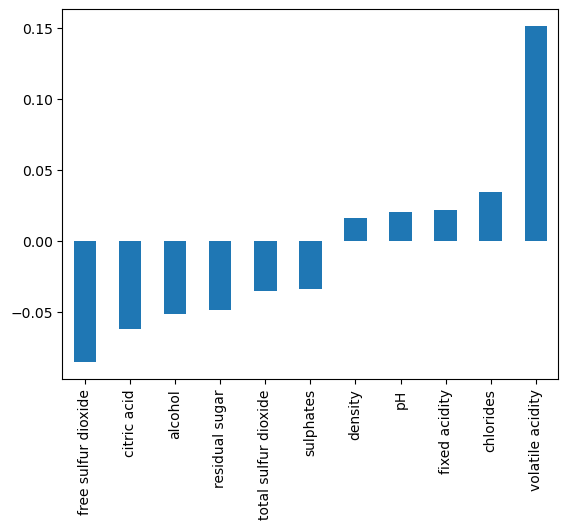

In [61]:
df.corr()["Fraud"][:-1].sort_values().plot(kind="bar")

C:\Users\Radhika\AppData\Local\Temp\ipykernel_8072\3512857711.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(data=df.corr())


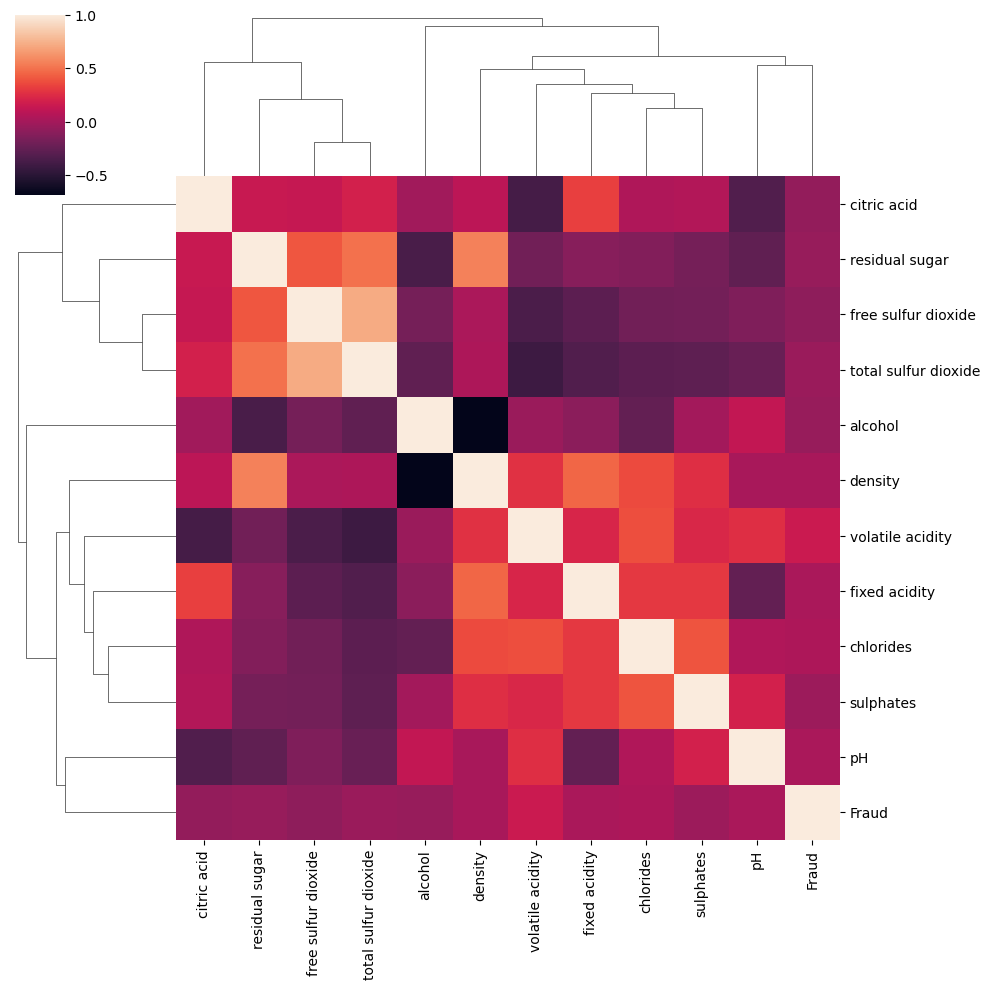

In [67]:
sns.clustermap(data=df.corr())

In [69]:
df["type"] = pd.get_dummies(df["type"], drop_first=True)

In [71]:
df = df.drop("Fraud", axis=1)

In [72]:
X = df.drop("quality", axis=1)
y = df["quality"]

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, 
                                                   random_state=101)

In [74]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [75]:
from sklearn.svm import SVC

svc = SVC(class_weight="balanced")

In [76]:
from sklearn.model_selection import GridSearchCV

param_grid = {"C": [0.001,0.01,0.1,0.5,1],
             "gamma": ["scale", "auto"]}
grid = GridSearchCV(svc, param_grid=param_grid)
grid.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto']})

In [77]:
grid.best_params_

{'C': 1, 'gamma': 'auto'}

Axes(0.125,0.11;0.62x0.77)
              precision    recall  f1-score   support

       Fraud       0.16      0.63      0.25        27
       Legit       0.98      0.85      0.91       623

    accuracy                           0.84       650
   macro avg       0.57      0.74      0.58       650
weighted avg       0.95      0.84      0.88       650



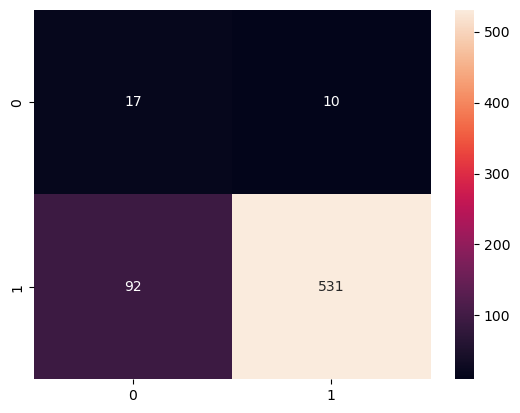

In [80]:
from sklearn.metrics import confusion_matrix, classification_report

pred = grid.predict(scaled_X_test)
print(sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt="g"))
print(classification_report(y_test, pred))